# GIS Data

In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# osmnx caching
ox.settings.use_cache = True
ox.settings.log_console = True

In [3]:
# Define the place
place_name = 'Da Nang, Vietnam'

In [4]:
# Get the boundary
try:
    place_gdf = ox.geocode_to_gdf(place_name)
    print("Successfully geocoded Da Nang.")
except Exception as e:
    print("Error geocoding {place_name}: {e}")

Successfully geocoded Da Nang.


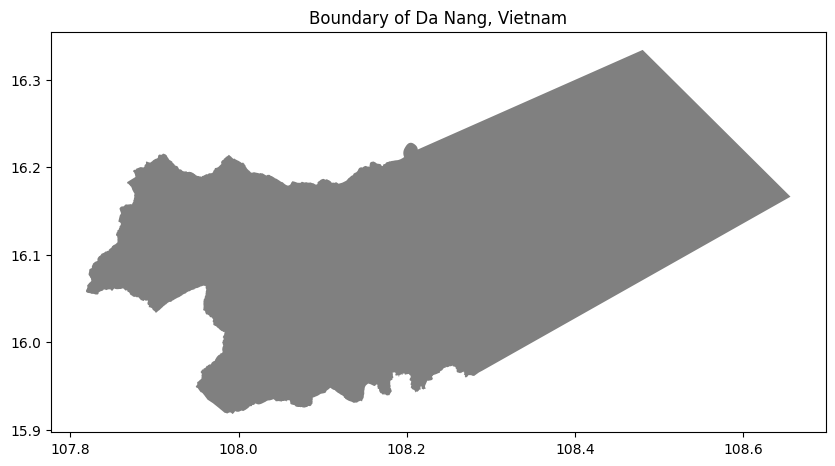

In [5]:
# plot the boundary
fig, ax = plt.subplots(figsize=(10, 10))
place_gdf.plot(ax=ax, fc="gray", ec="none")
ax.set_title(f"Boundary of {place_name}")
plt.show()

# Hold the actual shape of Da Nang boundary
place_polygon = place_gdf["geometry"].iloc[0]

# Fetching Road Network

Downloads the road network for Da Nang and converts it into a graph structure (nodes and edges).

Here, intersections are nodes, and road segments are edges.

In [6]:
# Get the driveable road network
road_network = ox.graph_from_place(place_name, network_type="drive_service", retain_all=True, truncate_by_edge=True)
# For a wider area or more detail if place_name is too restrictive:
# G = ox.graph_from_polygon(place_polygon, network_type="drive_service", retain_all=True, truncate_by_edge=True)

# Convert graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(road_network)
print(f"Fetched {len(nodes)} nodes and {len(edges)} edges.")

Fetched 31440 nodes and 79907 edges.


In [7]:
print("\nRoad Network Edges Info:")
print(edges.info())
print("\nRoad Network Edges Head:")
edges.head(5)


Road Network Edges Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 79907 entries, (np.int64(110518412), np.int64(6511729300), np.int64(0)) to (np.int64(12843415332), np.int64(1333762582), np.int64(0))
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     79907 non-null  object  
 1   highway   79907 non-null  object  
 2   lanes     11364 non-null  object  
 3   name      40510 non-null  object  
 4   oneway    79907 non-null  bool    
 5   ref       1765 non-null   object  
 6   reversed  79907 non-null  object  
 7   length    79907 non-null  float64 
 8   geometry  79907 non-null  geometry
 9   bridge    563 non-null    object  
 10  maxspeed  12910 non-null  object  
 11  tunnel    49 non-null     object  
 12  service   2214 non-null   object  
 13  junction  259 non-null    object  
 14  width     16 non-null     object  
 15  access    351 non-null    object  
 16  area      10 non-null   

osmid   highway lanes                 name  \
u         v          key                                                   
110518412 6511729300 0    693625795     trunk     3  Đường Nguyễn Văn Cừ   
          6164901423 0    658316514   service   NaN                  NaN   
110578444 4300003573 0    430182947     trunk     2     Đường Trường Sơn   
          7759798586 0    430182947     trunk     2     Đường Trường Sơn   
          3782881036 0     12207187  tertiary   NaN                  NaN   

                          oneway     ref reversed      length  \
u         v          key                                        
110518412 6511729300 0      True    QL.1    False    7.395584   
          6164901423 0     False     NaN    False   67.751049   
110578444 4300003573 0     False  QL.14B    False   99.609259   
          7759798586 0     False  QL.14B     True  160.832615   
          3782881036 0     False     NaN     True  346.765152   

                                                                   geometry  \
u         v          key                                                      
110518412 6511729300 0    LINESTRING (108.11929 16.12721, 108.11929 16.1...   
          6164901423 0    LINESTRING (108.11929 16.12721, 108.11876 16.1...   
110578444 4300003573 0    LINESTRING (108.13937 15.96018, 108.13936 15.9...   
          7759798586 0    LINESTRING (108.13937 15.96018, 108.13918 15.9...   
          3782881036 0    LINESTRING (108.13937 15.96018, 108.14149 15.9...   

                         bridge maxspeed tunnel service junction width access  \
u         v          key                                                        
110518412 6511729300 0      NaN      NaN    NaN     NaN      NaN   NaN    NaN   
          6164901423 0      NaN      NaN    NaN     NaN      NaN   NaN    NaN   
110578444 4300003573 0      NaN      NaN    NaN     NaN      NaN   NaN    NaN   
          7759798586 0      NaN      NaN    NaN     NaN      NaN   NaN    NaN   
          3782881036 0      NaN      NaN    NaN     NaN      NaN   NaN    NaN   

                         area  
u         v          key       
110518412 6511729300 0    NaN  
          6164901423 0    NaN  
110578444 4300003573 0    NaN  
          7759798586 0    NaN  
          3782881036 0    NaN

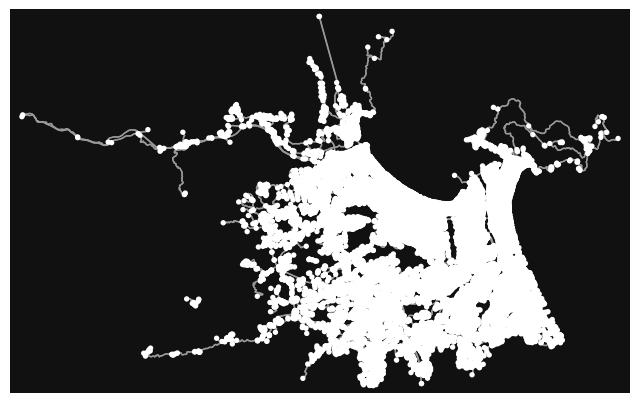

In [8]:
# plot the road network
fig, ax = ox.plot_graph(road_network)

# Buildings and POIs
Downloads geographic features representing buildings and various Points of Interest (POIs) within Da Nang's boundary.
- Buildings: Provide context about land use (residential, commercial, industrial). Children might be in or near specific building types.
- POIs: Indicate places children might go to or be near (schools, parks, shops, transport hubs).

In [9]:
feature_tags = {"building": True}
tags_pois = {
    "amenity": True,  # E.g., school, hospital, restaurant, parking
    "shop": True,     # E.g., supermarket, clothes, electronics
    "leisure": True,  # E.g., park, playground, sports_centre
    "tourism": True,  # E.g., hotel, museum, viewpoint
    "public_transport": True # E.g., bus_stop, station
}

buildings = ox.features_from_polygon(place_polygon, tags=feature_tags)
print(f"\nFetched {len(buildings)} building features")
# Fetching POIs
pois = ox.features_from_polygon(place_polygon, tags=tags_pois)
print(f"\nFetched {len(pois)} POI features.")


Fetched 48095 building features

Fetched 6018 POI features.


In [10]:
# Check if the building exist
if not buildings.empty:
    print(buildings.info())
    # We only want actual building areas, so filter for Polygon or MultiPolygon geometries
    buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.iloc[15:20]

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 48095 entries, ('node', np.int64(1708277593)) to ('way', np.int64(1387773183))
Columns: 138 entries, geometry to target
dtypes: geometry(1), object(137)
memory usage: 52.2+ MB
None


geometry  \
element  id                                                            
relation 8481845   POLYGON ((108.13795 15.98707, 108.13773 15.986...   
         10409478  POLYGON ((108.2297 16.01069, 108.22975 16.0106...   
         10515189  POLYGON ((108.22023 16.0694, 108.22009 16.0693...   
         13970600  POLYGON ((108.22278 16.0748, 108.22277 16.0749...   
         14257303  POLYGON ((108.2182 16.06771, 108.2183 16.06731...   

                  addr:housename addr:housenumber       addr:street  \
element  id                                                           
relation 8481845             NaN              NaN               NaN   
         10409478            NaN              NaN               NaN   
         10515189            NaN              NaN               NaN   
         13970600            NaN              NaN               NaN   
         14257303            NaN              NaN  Đường Hùng Vương   

                      building name addr:city addr:district building:levels  \
element  id                                                                   
relation 8481845           yes  NaN       NaN           NaN             NaN   
         10409478          yes  NaN       NaN           NaN             NaN   
         10515189  residential  NaN       NaN           NaN             NaN   
         13970600   university  NaN       NaN           NaN             NaN   
         14257303          yes  NaN       NaN           NaN             NaN   

                  height  ... food clothes building:flats consulate country  \
element  id               ...                                                 
relation 8481845     NaN  ...  NaN     NaN            NaN       NaN     NaN   
         10409478    NaN  ...  NaN     NaN            NaN       NaN     NaN   
         10515189    NaN  ...  NaN     NaN            NaN       NaN     NaN   
         13970600    NaN  ...  NaN     NaN            NaN       NaN     NaN   
         14257303    NaN  ...  NaN     NaN            NaN       NaN     NaN   

                  diplomatic diplomatic:services:consulate  \
element  id                                                  
relation 8481845         NaN                           NaN   
         10409478        NaN                           NaN   
         10515189        NaN                           NaN   
         13970600        NaN                           NaN   
         14257303        NaN                           NaN   

                  diplomatic:services:passport diplomatic:services:visa target  
element  id                                                                     
relation 8481845                           NaN                      NaN    NaN  
         10409478                          NaN                      NaN    NaN  
         10515189                          NaN                      NaN    NaN  
         13970600                          NaN                      NaN    NaN  
         14257303                          NaN                      NaN    NaN  

[5 rows x 138 columns]

In [11]:
if not pois.empty:
    print(pois.info())
pois.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 6018 entries, ('node', np.int64(728153314)) to ('way', np.int64(1387743314))
Columns: 250 entries, geometry to name:nl
dtypes: geometry(1), object(249)
memory usage: 11.7+ MB
None


geometry         addr:street amenity  \
element id                                                                  
node    728153314  POINT (108.19124 16.07133)  Đường Trần Cao Vân     atm   
        728153315  POINT (108.22009 16.06685)                 NaN     atm   
        728153316  POINT (108.22033 16.07041)                 NaN     atm   
        728153317  POINT (108.22003 16.06618)                 NaN     atm   
        728153318  POINT (108.20536 16.06621)                 NaN     atm   

                            operator check_date name addr:housenumber  \
element id                                                              
node    728153314       Dong A - ATM        NaN  NaN              NaN   
        728153315  Vietcombank - ATM        NaN  NaN              NaN   
        728153316  Techcombank - ATM        NaN  NaN              NaN   
        728153317  Southerbank - ATM        NaN  NaN              NaN   
        728153318       Dong A - ATM        NaN  NaN              NaN   

                  healthcare opening_hours phone  ... playground barrier  \
element id                                        ...                      
node    728153314        NaN           NaN   NaN  ...        NaN     NaN   
        728153315        NaN           NaN   NaN  ...        NaN     NaN   
        728153316        NaN           NaN   NaN  ...        NaN     NaN   
        728153317        NaN           NaN   NaN  ...        NaN     NaN   
        728153318        NaN           NaN   NaN  ...        NaN     NaN   

                  ferry garden:type food type boundary name:fi name:it name:nl  
element id                                                                      
node    728153314   NaN         NaN  NaN  NaN      NaN     NaN     NaN     NaN  
        728153315   NaN         NaN  NaN  NaN      NaN     NaN     NaN     NaN  
        728153316   NaN         NaN  NaN  NaN      NaN     NaN     NaN     NaN  
        728153317   NaN         NaN  NaN  NaN      NaN     NaN     NaN     NaN  
        728153318   NaN         NaN  NaN  NaN      NaN     NaN     NaN     NaN  

[5 rows x 250 columns]

# Initial GIS Data Cleaning and Structuring

- Changes all geographic data to a consistent projected CRS (Coordinate Reference System).
- Fills in some missing values (for example: building type) + Create a single "pot_type" column.
- Store the processed GeoDataFrame inside Parquet files for reuse.

In [12]:
TARGET_CRS = "EPSG:32648" # UTM Zone 48N.

if not buildings.empty:
    # Converts the GeoDataFrame's coordinate system.
    # For accurate distance/area calculations, it's better to use a projected CRS like UTM.
    buildings = buildings.to_crs(TARGET_CRS)
    buildings['building'] = buildings['building'].fillna('unknown') # Handle missing building types
    # Save to Parquet format
    buildings.to_parquet("danang_buildings_processed.parquet")

if not pois.empty:
    pois = pois.to_crs(TARGET_CRS)
    # Consolidate POI types for simplicity.
    # This creates a new 'poi_type_raw' by taking the first non-null value from the listed amenity/shop etc. columns for each row.
    poi_cols = ['amenity', 'shop', 'leisure', 'tourism', 'public_transport']
    pois['poi_type_raw'] = pois[poi_cols].bfill(axis=1).iloc[:, 0]
    pois['poi_type'] = pois['poi_type_raw'].fillna('unknown') # Fill any remaining NaNs
    # Save to Parquet format
    pois.to_parquet("danang_pois_processed.parquet")

edges = edges.to_crs(TARGET_CRS)

# Save intermediate files
# Saves a DataFrame/GeoDataFrame to Parquet format, which is efficient for storage and speed.
# edges.to_parquet("danang_edges_processed.parquet")
place_gdf.to_crs(TARGET_CRS).to_parquet("danang_boundary_processed.parquet")

# Gridding Da Nang
Divides the geographic area of Da Nang into a grid of uniform square cells (e.g., 100m x 100m). Each cell gets a unique ID. The AI model (LSTM) will predict the probability of the child being in one of these specific grid cells. This discretizes continuous space into manageable units.

In [18]:
from shapely.geometry import Polygon # For creating polygon shapes

# Define grid cell size in meters
CELL_SIZE_METERS = 100

# Get bounding box of Da Nang in the target CRS (UTM, so units are meters)
place_polygon_for_gridding = place_gdf["geometry"].iloc[0] # Place polygon in meters (re-extract)
minx, miny, maxx, maxy = place_polygon_for_gridding.bounds

# Create lists of x and y coordinates for the grid lines
x_coords = list(range(int(minx), int(maxx) + CELL_SIZE_METERS, CELL_SIZE_METERS))
y_coords = list(range(int(miny), int(maxy) + CELL_SIZE_METERS, CELL_SIZE_METERS))

grid_cells_list = []
grid_id_counter = 0
# Loop through the x and y coordinates to create cell polygons
for i in range(len(x_coords) - 1):
    for j in range(len(y_coords) - 1):
        # Define the four corners of a cell
        cell_poly = Polygon([
            (x_coords[i], y_coords[j]),
            (x_coords[i+1], y_coords[j]),
            (x_coords[i+1], y_coords[j+1]),
            (x_coords[i], y_coords[j+1])
        ])
        # Only include cells whose centroid is within Da Nang or that intersect Da Nang
        # This avoids creating grid cells far outside the actual city area.
        if cell_poly.centroid.within(place_polygon_for_gridding) or cell_poly.intersects(place_polygon_for_gridding):
             grid_cells_list.append({"grid_id": f"cell_{grid_id_counter}", "geometry": cell_poly})
             grid_id_counter += 1

# Create a GeoDataFrame from the list of cell dictionaries
grid_gdf = gpd.GeoDataFrame(grid_cells_list, crs=TARGET_CRS)
print(f"\nCreated {len(grid_gdf)} grid cells...")

grid_gdf.to_parquet("danang_grid.parquet")


Created 212350 grid cells...


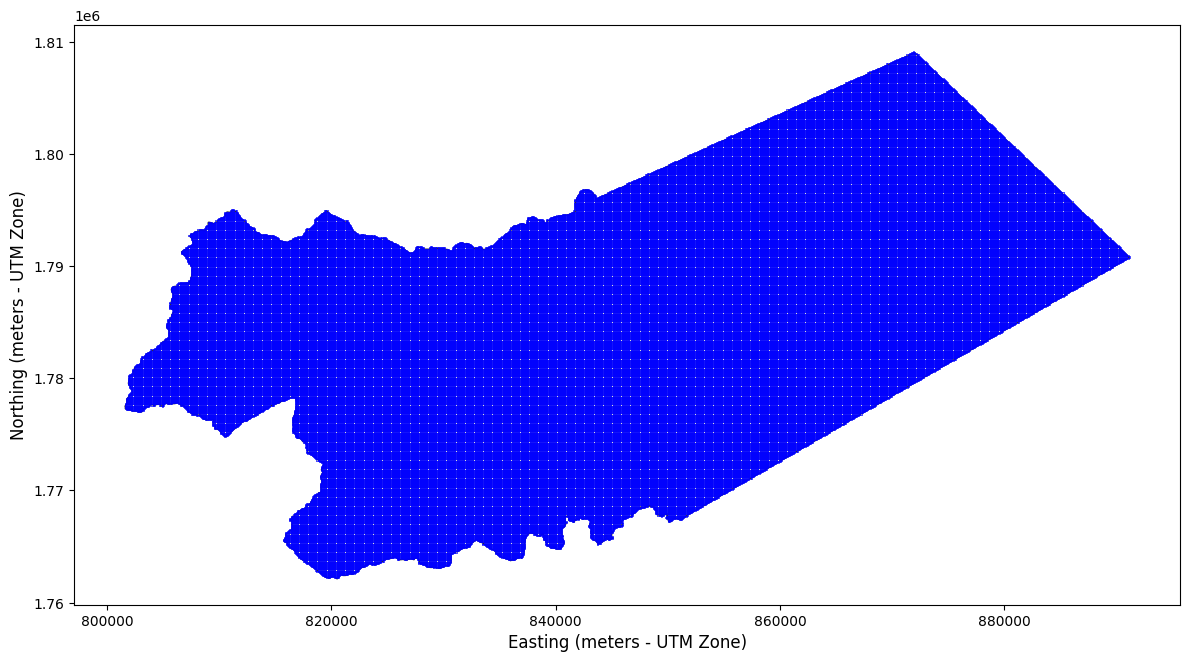

Plotted 212350 grid cells over the Da Nang boundary.


In [19]:
# Load the Da Nang boundary
place_gdf = gpd.read_parquet("danang_boundary_processed.parquet")
# Load the created grid
grid_gdf = gpd.read_parquet("danang_grid.parquet")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
place_gdf.plot(ax=ax, facecolor='lightgray', edgecolor='black', linewidth=1, label='Da Nang Boundary', alpha=0.8)
# Plot the grid cells on top
grid_gdf.plot(ax=ax, facecolor="none", edgecolor='blue', linewidth=0.5, label='Grid Cells')

# --- Customize the plot (optional) ---
ax.set_xlabel("Easting (meters - UTM Zone)", fontsize=12) # Assuming UTM projection
ax.set_ylabel("Northing (meters - UTM Zone)", fontsize=12) # Assuming UTM projection

plt.tight_layout()

# Display the plot
plt.show()

print(f"Plotted {len(grid_gdf)} grid cells over the Da Nang boundary.")

# Feature Engineering: Associating GIS Data with Grid Cells.

For each cell, it calculates features like:
- The dominant building type (e.g., residential, commercial).
- Counts of different building types.
- Counts of different POI types (e.g., number of schools, parks).
- Total road length within the cell and road density.
- Converts categorical features (like dominant building type) into a numerical format (one-hot encoding) suitable for machine learning.

In [20]:
# --- Dominant Building Type per Grid Cell ---
if not buildings.empty:
    # 'buildings' and 'grid_gdf' are joined.
    # Only keeps grid cells that have buildings and buildings that fall in grid cells.
    buildings_in_grid = gpd.sjoin(buildings, grid_gdf, how="inner", predicate="intersects") # Assuming 'grid_gdf' is defined

    # Count building types within each grid cell
    # Groups rows by grid cell ID and then by building type.
    if 'grid_id' in buildings_in_grid.columns and 'building' in buildings_in_grid.columns: # Added check
        building_type_counts = buildings_in_grid.groupby(['grid_id', 'building']).size().unstack(fill_value=0)
    
        if not building_type_counts.empty:
            # .idxmax(axis=1): For each grid cell (row), finds the building type (column name) with the highest count.
            dominant_building_type = building_type_counts.idxmax(axis=1).rename('dominant_building_type')
            # Join this new 'dominant_building_type' series back to the main grid_gdf
            grid_gdf = grid_gdf.join(dominant_building_type, on='grid_id') # Assumes grid_gdf has 'grid_id' as index or column to join on
            # Add individual building type counts as separate features
            for col in building_type_counts.columns:
                col_name = f"building_count_{str(col).replace(' ', '_').lower()}" # Sanitize name
                grid_gdf = grid_gdf.join(building_type_counts[[col]].rename(columns={col: col_name}), on='grid_id') # Use col_name
                grid_gdf[col_name] = grid_gdf[col_name].fillna(0) # Use col_name

# Ensure dominant_building_type column exists and is filled
if 'dominant_building_type' not in grid_gdf.columns:
    grid_gdf['dominant_building_type'] = 'none' # Or some other appropriate default
else:
    grid_gdf['dominant_building_type'] = grid_gdf['dominant_building_type'].fillna('none')


# --- POI Counts per Grid Cell (similar to above) ---
if not pois.empty and 'poi_type' in pois.columns and 'grid_id' in grid_gdf.columns: # Assuming 'pois' GeoDataFrame is defined and loaded
    # Spatial join POIs (usually points) to grid cells.
    pois_in_grid = gpd.sjoin(pois, grid_gdf, how="inner", predicate="within")
    if not pois_in_grid.empty and 'grid_id' in pois_in_grid.columns and 'poi_type' in pois_in_grid.columns: # Added check
        poi_type_counts = pois_in_grid.groupby(['grid_id', 'poi_type']).size().unstack(fill_value=0)
        # START OF FILLED SECTION for POIs
        if not poi_type_counts.empty:
            for poi_category in poi_type_counts.columns:
                col_name = f"poi_count_{str(poi_category).replace(' ', '_').lower()}"
                grid_gdf = grid_gdf.join(poi_type_counts[[poi_category]].rename(columns={poi_category: col_name}), on='grid_id')
                grid_gdf[col_name] = grid_gdf[col_name].fillna(0)
            
            # Calculate total POI count
            poi_count_columns = [col for col in grid_gdf.columns if col.startswith('poi_count_')]
            if poi_count_columns:
                grid_gdf['total_poi_count'] = grid_gdf[poi_count_columns].sum(axis=1)
            else:
                grid_gdf['total_poi_count'] = 0
        else: # poi_type_counts was empty
            grid_gdf['total_poi_count'] = 0
    else: # pois_in_grid was empty or missing columns
        grid_gdf['total_poi_count'] = 0
else: # pois DataFrame was empty or missing columns
    grid_gdf['total_poi_count'] = 0


# --- Road Length/Density per Grid Cell ---
if not edges.empty and 'geometry' in edges.columns and not grid_gdf.empty and 'grid_id' in grid_gdf.columns: 
    road_lengths = {}
    # Creates a spatial index for the 'edges' GeoDataFrame. This speeds up spatial queries significantly.
    edges_sindex = edges.sindex
    for idx, cell in grid_gdf.iterrows(): # Loop through each grid cell
        cell_geom = cell.geometry
        # Use spatial index to find roads whose bounding boxes intersect the cell's bounding box (fast first pass filter)
        possible_matches_index = list(edges_sindex.intersection(cell_geom.bounds))
        possible_matches = edges.iloc[possible_matches_index]
        # Precise intersection check
        intersecting_roads = possible_matches[possible_matches.intersects(cell_geom)]
        
        total_length = 0.0 # Ensure float
        if not intersecting_roads.empty:
            for _, road in intersecting_roads.iterrows():
                try:
                    # For a line and a polygon, this gives the part of the line within the polygon.
                    intersection = road.geometry.intersection(cell_geom)
                    total_length += intersection.length # gives length in the CRS units (meters)
                except Exception: pass # Handle potential geometry errors
        road_lengths[cell.grid_id] = total_length # Assumes cell has 'grid_id' attribute/column
    
    grid_gdf['road_length_m'] = grid_gdf['grid_id'].map(road_lengths).fillna(0.0) # Ensure float and fill
    if 'CELL_SIZE_METERS' in locals() and CELL_SIZE_METERS is not None and CELL_SIZE_METERS > 0: # Check CELL_SIZE_METERS
        grid_gdf['road_density'] = grid_gdf['road_length_m'] / (CELL_SIZE_METERS**2)
    else:
        grid_gdf['road_density'] = 0.0 # Default if CELL_SIZE_METERS is invalid

# Ensure road_length_m and road_density columns exist if the block was skipped
if 'road_length_m' not in grid_gdf.columns: grid_gdf['road_length_m'] = 0.0
if 'road_density' not in grid_gdf.columns: grid_gdf['road_density'] = 0.0


# --- One-Hot Encoding ---
if 'dominant_building_type' in grid_gdf.columns:
    # pd.get_dummies: Converts categorical variable(s) into dummy/indicator variables (0s and 1s).
    # Creates new columns like 'btype_residential', 'btype_commercial', etc.
    grid_gdf = pd.get_dummies(grid_gdf, columns=['dominant_building_type'], prefix='btype', dummy_na=False) # Added dummy_na=False

# Fill any NaNs that might have appeared from joins or calculations.
for col in grid_gdf.columns:
    # Check if column is numeric AND has NaNs
    if pd.api.types.is_numeric_dtype(grid_gdf[col]) and grid_gdf[col].isnull().any():
        grid_gdf[col] = grid_gdf[col].fillna(0)

grid_gdf.to_parquet("danang_grid_with_features.parquet")

In [21]:
grid_gdf.shape

(212350, 238)

In [22]:
pd.set_option("display.max_columns", None)
grid_gdf.loc[grid_gdf['building_count_apartments'] == 2]

grid_id                                           geometry  \
63641    cell_63641  POLYGON ((831976 1778861, 832076 1778861, 8320...   
63911    cell_63911  POLYGON ((832076 1778761, 832176 1778761, 8321...   
92081    cell_92081  POLYGON ((842076 1772261, 842176 1772261, 8421...   
92371    cell_92371  POLYGON ((842176 1772161, 842276 1772161, 8422...   
92372    cell_92372  POLYGON ((842176 1772261, 842276 1772261, 8422...   
92665    cell_92665  POLYGON ((842276 1772261, 842376 1772261, 8423...   
98131    cell_98131  POLYGON ((844076 1771361, 844176 1771361, 8441...   
98132    cell_98132  POLYGON ((844076 1771461, 844176 1771461, 8441...   
102521  cell_102521  POLYGON ((845476 1781361, 845576 1781361, 8455...   
102522  cell_102522  POLYGON ((845476 1781461, 845576 1781461, 8455...   
102832  cell_102832  POLYGON ((845576 1782261, 845676 1782261, 8456...   
103129  cell_103129  POLYGON ((845676 1781661, 845776 1781661, 8457...   
103431  cell_103431  POLYGON ((845776 1781561, 845876 1781561, 8458...   
103733  cell_103733  POLYGON ((845876 1781661, 845976 1781661, 8459...   

        building_count_apartments  building_count_bridge  \
63641                         2.0                    0.0   
63911                         2.0                    0.0   
92081                         2.0                    0.0   
92371                         2.0                    0.0   
92372                         2.0                    0.0   
92665                         2.0                    0.0   
98131                         2.0                    0.0   
98132                         2.0                    0.0   
102521                        2.0                    0.0   
102522                        2.0                    0.0   
102832                        2.0                    0.0   
103129                        2.0                    0.0   
103431                        2.0                    0.0   
103733                        2.0                    0.0   

        building_count_cathedral  building_count_church  building_count_civic  \
63641                        0.0                    0.0                   0.0   
63911                        0.0                    0.0                   0.0   
92081                        0.0                    0.0                   0.0   
92371                        0.0                    0.0                   0.0   
92372                        0.0                    0.0                   0.0   
92665                        0.0                    0.0                   0.0   
98131                        0.0                    0.0                   0.0   
98132                        0.0                    0.0                   0.0   
102521                       0.0                    0.0                   0.0   
102522                       0.0                    0.0                   0.0   
102832                       0.0                    0.0                   0.0   
103129                       0.0                    0.0                   0.0   
103431                       0.0                    0.0                   0.0   
103733                       0.0                    0.0                   0.0   

        building_count_college  building_count_commercial  \
63641                      0.0                        0.0   
63911                      0.0                        0.0   
92081                      0.0                        0.0   
92371                      0.0                        0.0   
92372                      0.0                        0.0   
92665                      0.0                        0.0   
98131                      0.0                        0.0   
98132                      0.0                        0.0   
102521                     0.0                        0.0   
102522                     0.0                        0.0   
102832                     0.0                        0.0   
103129                     0.0                      